In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [216]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams.update({'font.size': 18})

### data : https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [2]:
df = pd.read_csv('/Users/alenjose/Desktop/data/car_sales_linear_reg/vehicles.csv')

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum() / df.shape[0]

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64

In [24]:
pd.DataFrame(df.description.value_counts())

description
35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! TA...          231
Call or text today to find out more. (602) 620-...          197
...                                                         ...
No Money Down Auto Loans!Answer 5 easy question...            1
Carvana is the safer way to buy a car During th...            1

[360911 rows x 1 columns]

In [61]:
pd.options.display.max_rows = 99

In [27]:
df.shape

(426880, 26)

In [37]:
# so we need to convert it to str to perform the function below
type(df['description'][0])

float

In [42]:
# 70 rows have no descriptions : 
df['description'].isna().sum()

70

In [47]:
pd.isna(df['description'][0])

True

In [48]:
def find_len(x):
    if(pd.isna(x)):
        length = 0
    else:
        length = len(x)
    return length

In [54]:
# def find_len(x):
#     if(pd.isna(x)):
#         length = 0
#     else:
#         words = x.split()
#         length = len(words)
#     return length

In [49]:
df['desc_length'] = df['description'].apply(lambda x:find_len(x))

In [65]:
df['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [75]:
df['cylinders'] = df['cylinders'].apply(lambda x:str(x).replace('cylinders','').strip())

In [76]:
df['cylinders'].value_counts()

nan      177678
6         94169
4         77642
8         72062
5          1712
10         1455
other      1298
3           655
12          209
Name: cylinders, dtype: int64

In [79]:
df['cylinders'] = pd.to_numeric(df['cylinders'],errors='coerce')

In [222]:
df['cylinders'].value_counts()

6.0     94169
4.0     77642
8.0     72062
5.0      1712
10.0     1455
3.0       655
12.0      209
Name: cylinders, dtype: int64

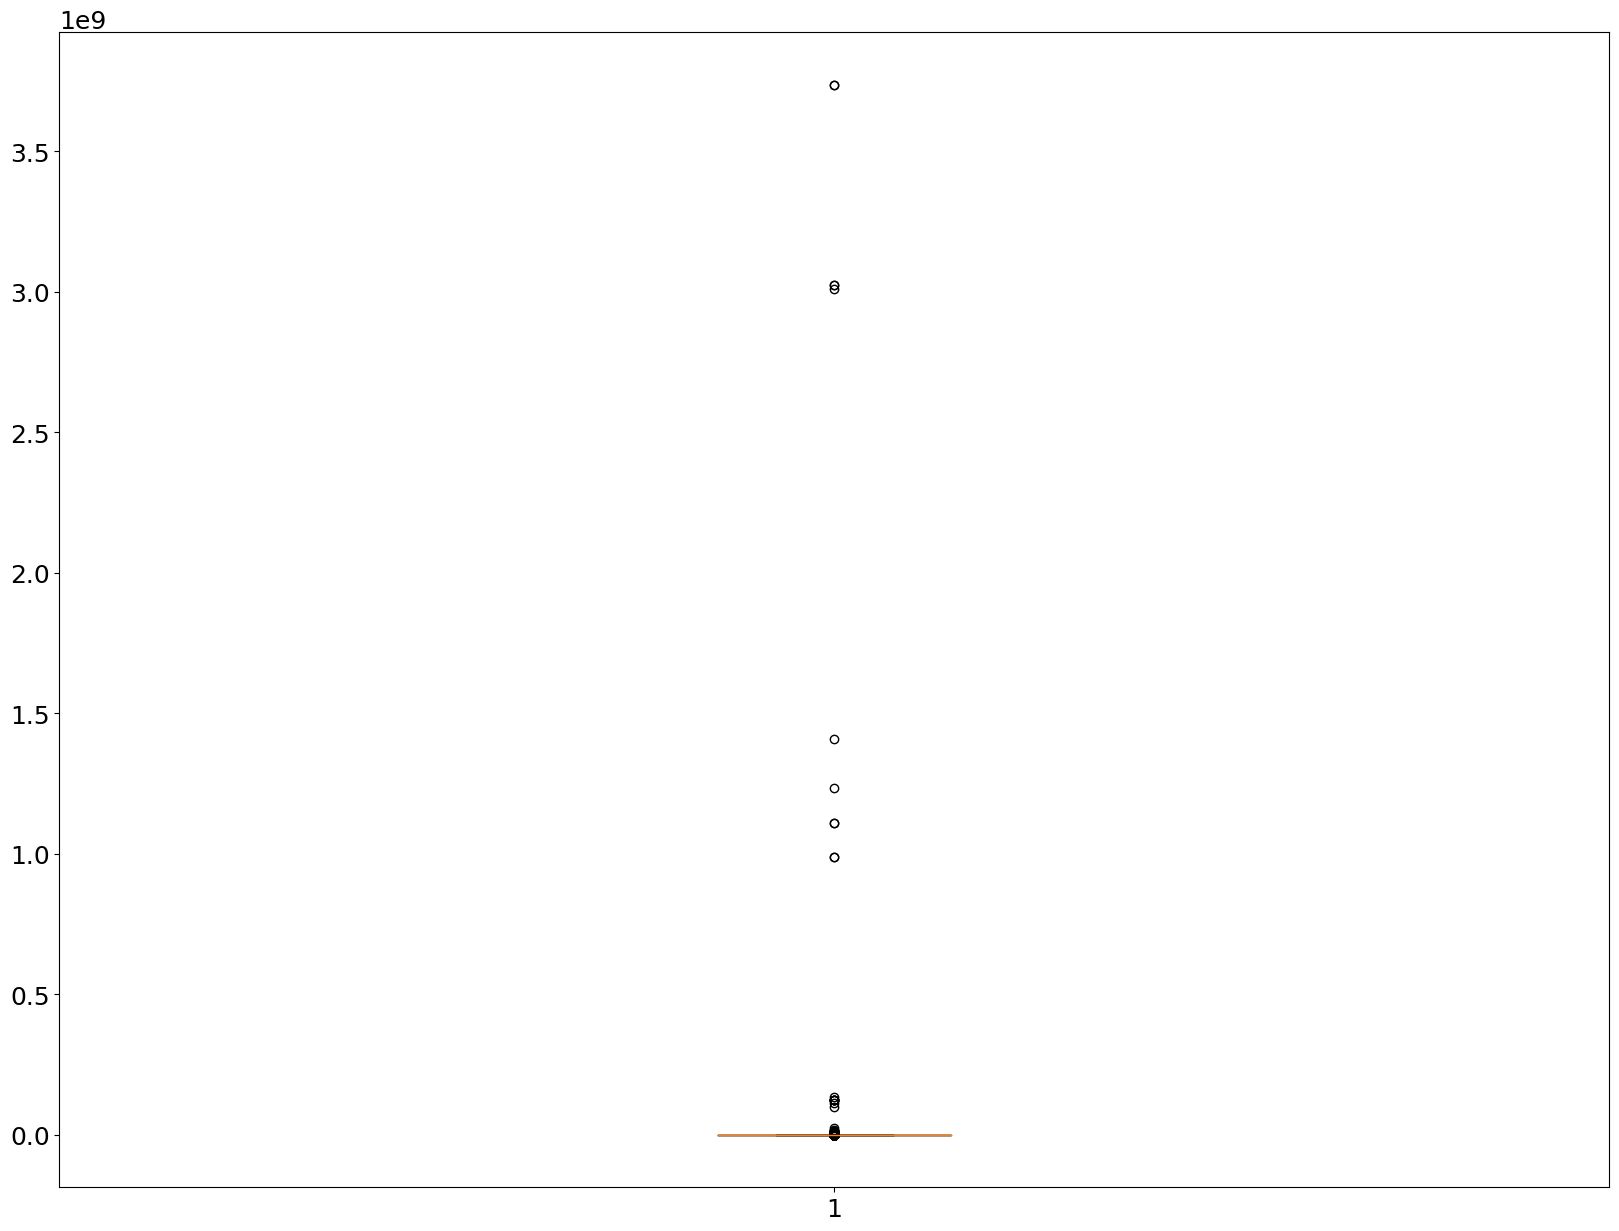

In [223]:
plt.boxplot(df['price'])
plt.show()

In [224]:
percentiles = np.percentile(df['price'], [5, 99.95])

# Find the outliers in the 'price' column
outliers = df[(df['price'] < percentiles[0]) | (df['price'] > percentiles[1])]

In [225]:
df1 = df[~df.index.isin(outliers.index)]

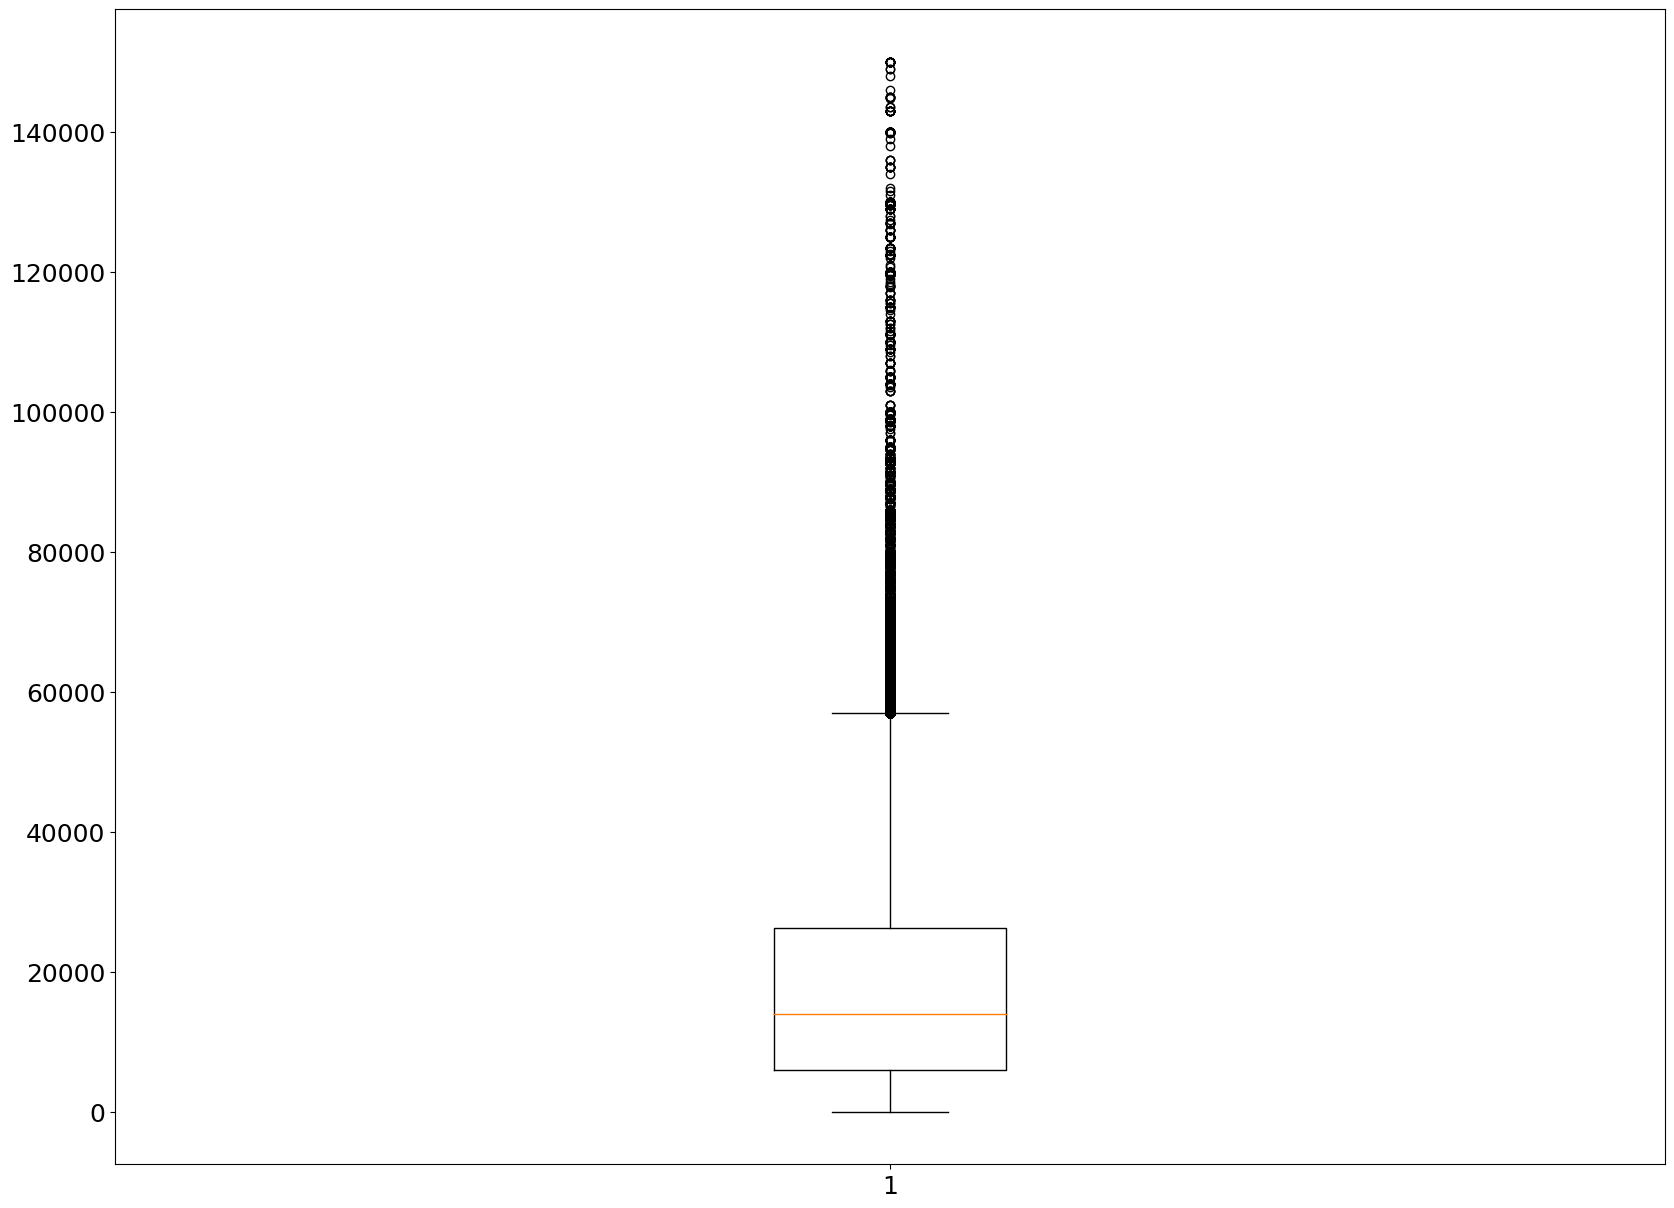

In [226]:
plt.boxplot(df1['price'])
plt.show()

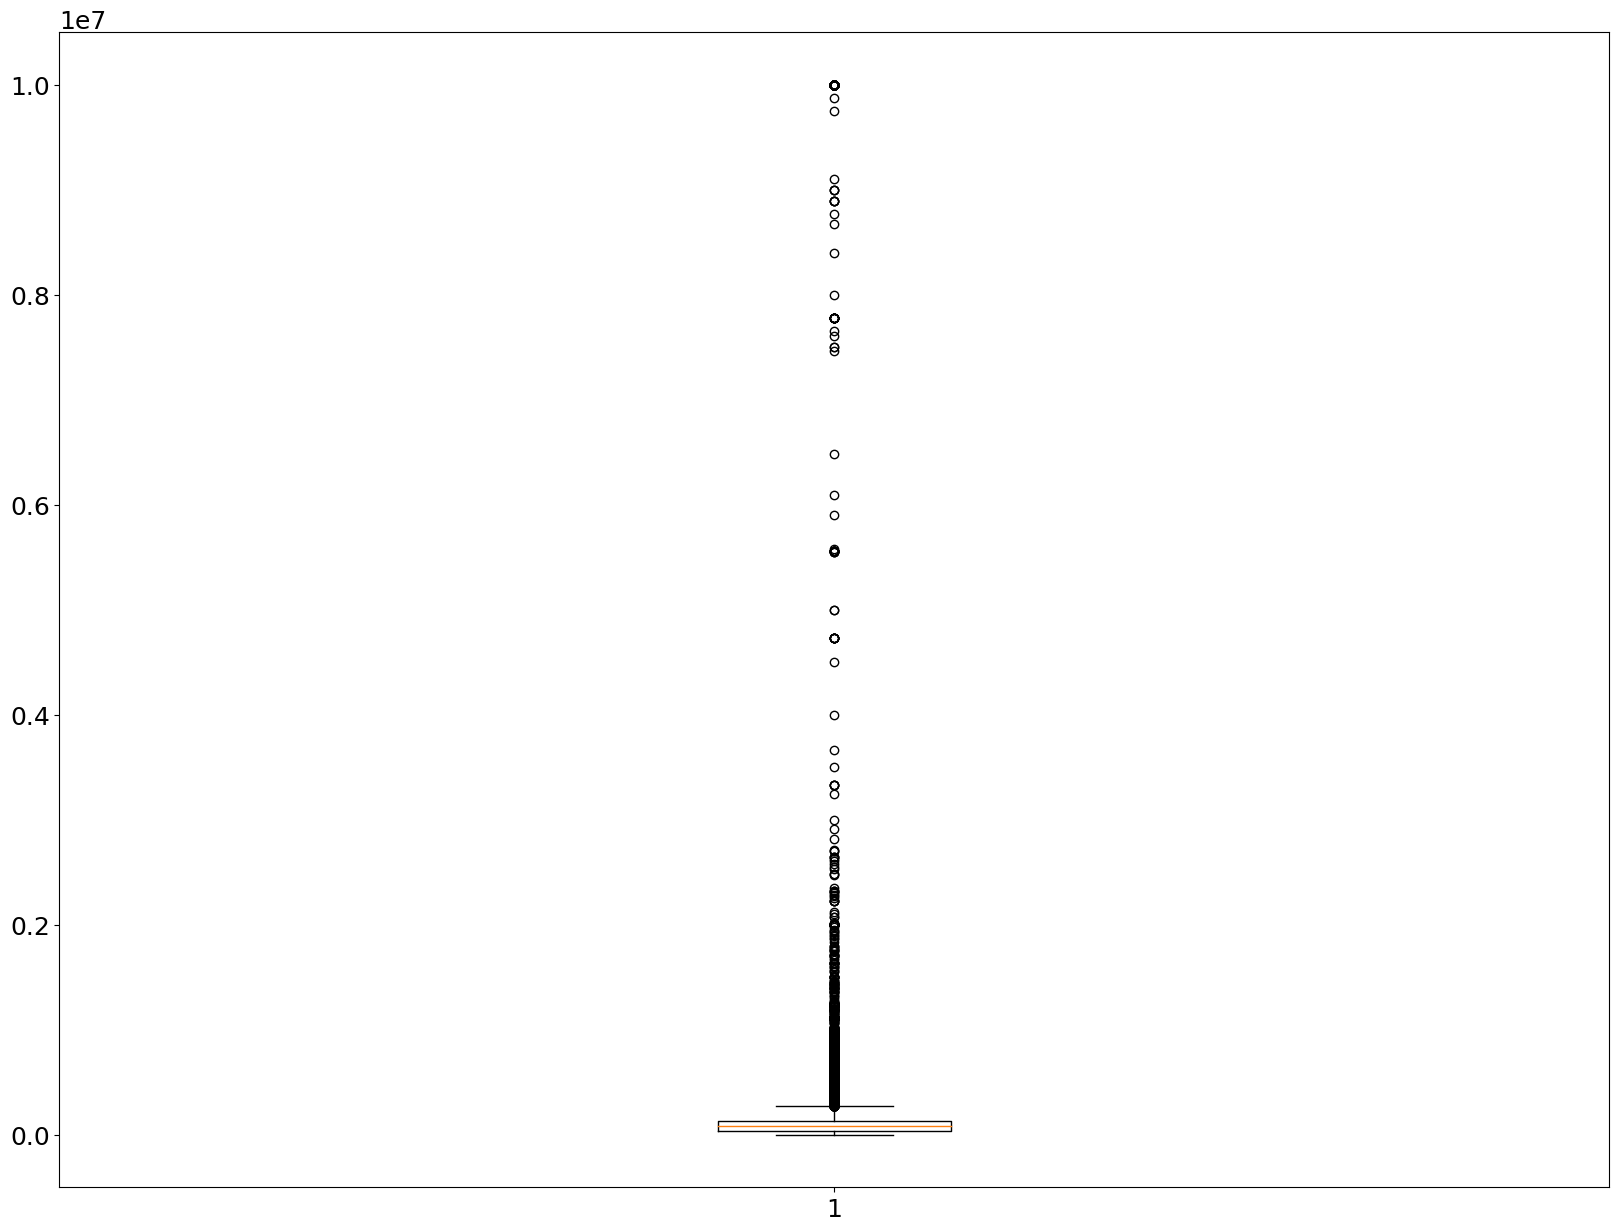

In [227]:
plt.boxplot(df1['odometer'].dropna())
plt.show()

In [228]:
df1['odometer'].describe()

count    4.222760e+05
mean     9.802867e+04
std      2.133544e+05
min      0.000000e+00
25%      3.772500e+04
50%      8.555900e+04
75%      1.335665e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [175]:
df2 = df1.copy().dropna(subset=['odometer'])

In [200]:
percentiles = np.percentile(df2['odometer'], [5, 99])

# Remove any data point outside the percentile range
df3 = df2[(df2['odometer'] >= percentiles[0]) & (df2['odometer'] <= percentiles[1])]


In [201]:
df3['odometer'].describe()

count    290705.000000
mean      82431.506513
std       52693.600249
min        6567.000000
25%       36741.000000
50%       76430.000000
75%      118158.000000
max      255000.000000
Name: odometer, dtype: float64

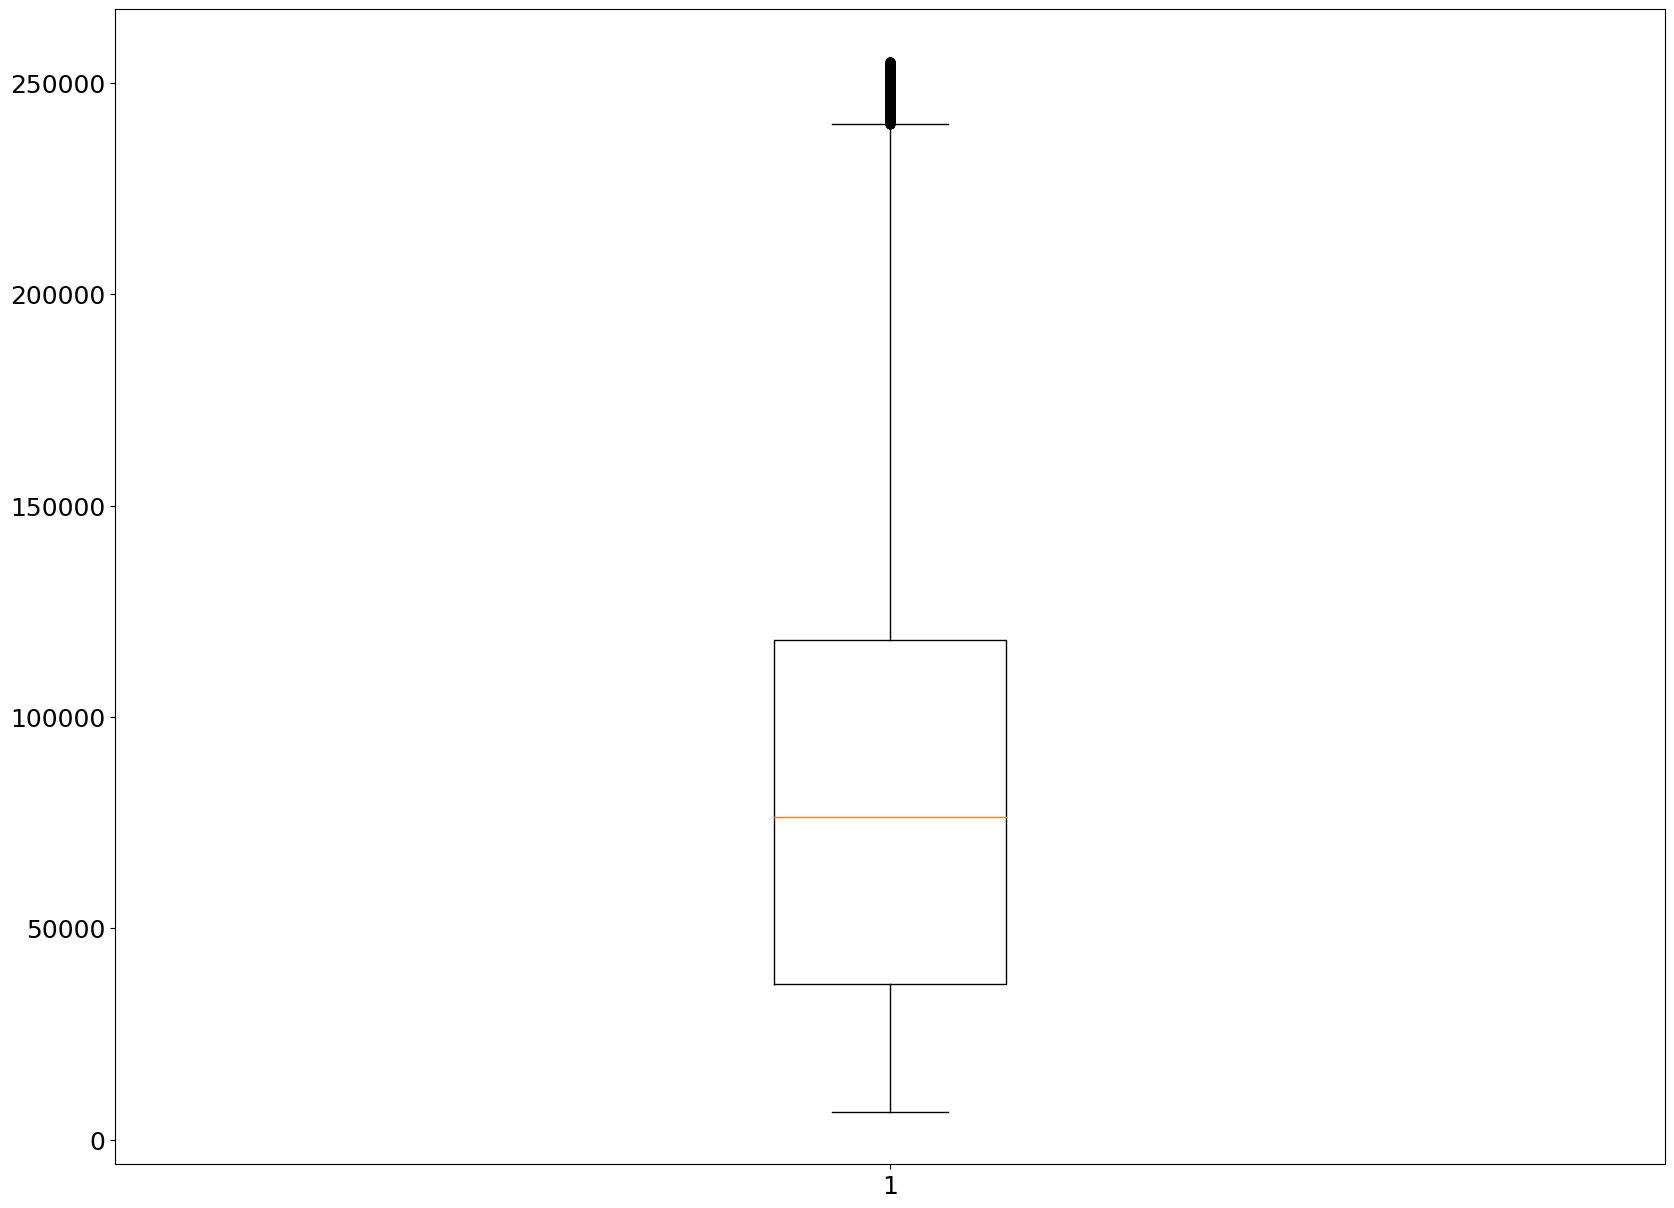

In [218]:
plt.boxplot(df3['odometer'])
plt.show()

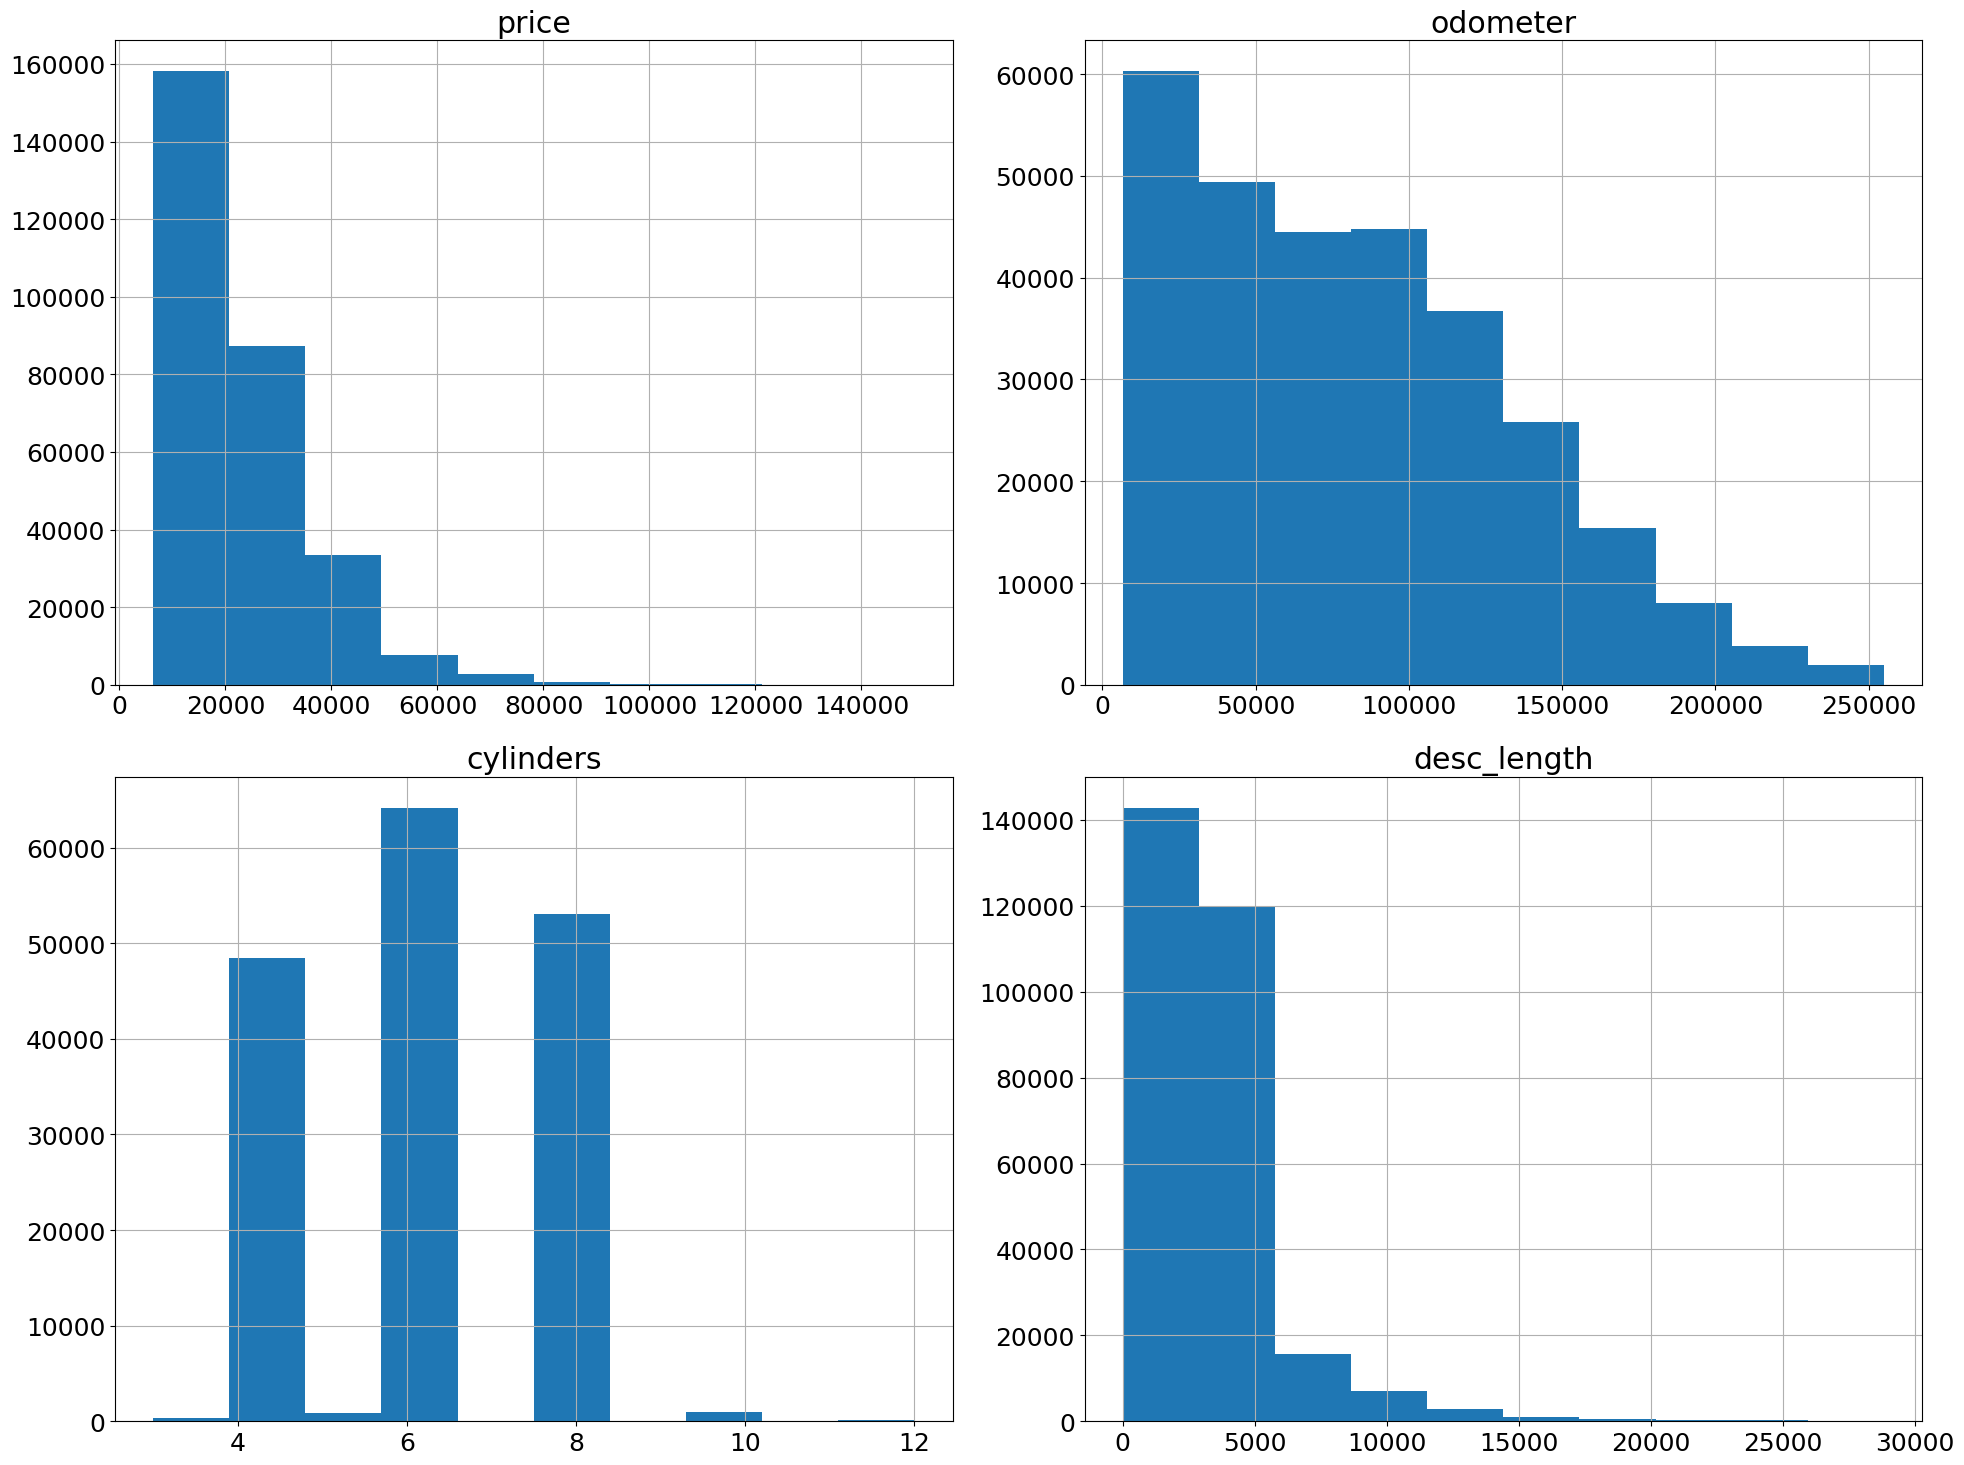

In [230]:
df3[['price','odometer','cylinders','desc_length']].hist()
plt.tight_layout()
plt.show()